# **Linear Regression**
Mounting google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


importing required libraries

In [3]:
import numpy as np
import pandas as pd
import csv

Load the data

In [4]:
df=pd.read_csv("/content/drive/MyDrive/kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


**Clean the data:**
1. Most of the values in 'yr_renovated' column are 'zero' because those houses are not renovated since built. In such cases make yr_renovated = yr_built.
2. create columns 'age' and 'age_renovated' from 'yr_built' and 'yr_renovated' columns by substracting them from current year.
3. Drop all the unimportant columns from the dataframe. 
4. 'sqft_basement' column has a lot of zeros, which does not add much information. so, remove it.  

In [5]:
df['yr_renovated']=df['yr_renovated'].mask(df['yr_renovated'].eq(0),df['yr_built'])

In [6]:
df['age'] = 2022 - df['yr_built']
df['age_renovated'] = 2022 - df['yr_renovated']

In [7]:
df = df.drop(['id', 'date', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'waterfront', 'view'], axis = 1)

In [9]:
df = df.drop(['sqft_basement'], axis = 1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_living15,sqft_lot15,age,age_renovated
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,1340,5650,67,67
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,1690,7639,71,31
2,180000.0,2,1.00,770,10000,1.0,3,6,770,2720,8062,89,89
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,1360,5000,57,57
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,1800,7503,35,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,3,8,1530,1530,1509,13,13
21609,400000.0,4,2.50,2310,5813,2.0,3,8,2310,1830,7200,8,8
21610,402101.0,2,0.75,1020,1350,2.0,3,7,1020,1020,2007,13,13
21611,400000.0,3,2.50,1600,2388,2.0,3,8,1600,1410,1287,18,18


Convert the dataframe in to nd-array to perform matrix operations.

In [10]:
data = np.array(df, dtype=float)

In [11]:
data.shape

(21613, 13)

**Scaling the dataset**

scaled_Xi = (Xi - mean(Xi)) / std(Xi)



In [12]:
mu,std = [],[]
for i in range(0,data.shape[1]):
		data[:,i] = ((data[:,i] - np.mean(data[:,i]))/np.std(data[:, i]))
		mu.append(np.mean(data[:,i]))
		std.append(np.std(data[:, i]))
data

array([[-0.86671733, -0.39873715, -1.44746357, ..., -0.26071541,
         0.54489777,  0.63826626],
       [-0.00568792, -0.39873715,  0.1756067 , ..., -0.18786773,
         0.6810785 , -0.61146524],
       [-0.98084935, -1.47395936, -1.44746357, ..., -0.17237524,
         1.29389179,  1.40199107],
       ...,
       [-0.37586519, -1.47395936, -1.77207762, ..., -0.39414129,
        -1.29354209, -1.23633099],
       [-0.38158814, -0.39873715,  0.50022075, ..., -0.42051149,
        -1.12331618, -1.06275717],
       [-0.58588173, -1.47395936, -1.77207762, ..., -0.41794772,
        -1.25949691, -1.20161623]])

In [14]:
data[0]

array([-0.86671733, -0.39873715, -1.44746357, -0.97983502, -0.22832133,
       -0.915427  , -0.62918687, -0.55883575, -0.73470764, -0.9433552 ,
       -0.26071541,  0.54489777,  0.63826626])

Setting 'house_price' as target variable(Y) and array of all the other columns as input feature vector(X).

In [15]:
X,Y = data[:,1:], data[:,0]
Y,X

(array([-0.86671733, -0.00568792, -0.98084935, ..., -0.37586519,
        -0.38158814, -0.58588173]),
 array([[-0.39873715, -1.44746357, -0.97983502, ..., -0.26071541,
          0.54489777,  0.63826626],
        [-0.39873715,  0.1756067 ,  0.53363434, ..., -0.18786773,
          0.6810785 , -0.61146524],
        [-1.47395936, -1.44746357, -1.42625404, ..., -0.17237524,
          1.29389179,  1.40199107],
        ...,
        [-1.47395936, -1.77207762, -1.15404732, ..., -0.39414129,
         -1.29354209, -1.23633099],
        [-0.39873715,  0.50022075, -0.52252773, ..., -0.42051149,
         -1.12331618, -1.06275717],
        [-1.47395936, -1.77207762, -1.15404732, ..., -0.41794772,
         -1.25949691, -1.20161623]]))

Splitting the dataset in to train and test sets.

In [16]:
x_train, x_test = X[:20000], X[20000:]
y_train, y_test = Y[:20000], Y[20000:]
x_train.shape, y_train.shape

((20000, 12), (20000,))

To simplify the vectorization, insert '1' to each traing example, so that the first feature value of each training example is one.

In [17]:
x_train = np.hstack((np.ones((x_train.shape[0],1)), x_train))
x_test = np.hstack((np.ones((x_test.shape[0],1)), x_test))

In [18]:
x_train[:3]

array([[ 1.        , -0.39873715, -1.44746357, -0.97983502, -0.22832133,
        -0.915427  , -0.62918687, -0.55883575, -0.73470764, -0.9433552 ,
        -0.26071541,  0.54489777,  0.63826626],
       [ 1.        , -0.39873715,  0.1756067 ,  0.53363434, -0.18988538,
         0.93650577, -0.62918687, -0.55883575,  0.46084084, -0.43268619,
        -0.18786773,  0.6810785 , -0.61146524],
       [ 1.        , -1.47395936, -1.44746357, -1.42625404, -0.12329847,
        -0.915427  , -0.62918687, -1.40958711, -1.22983377,  1.07013975,
        -0.17237524,  1.29389179,  1.40199107]])

In [19]:
x_test[0:3]

array([[ 1.        , -0.39873715,  0.50022075, -0.89272887, -0.33812454,
         2.78843855, -0.62918687,  0.29191561, -0.63809766, -0.97253628,
        -0.37608503, -1.22545173, -1.16690146],
       [ 1.        , -0.39873715,  0.50022075, -0.45719812, -0.32388006,
         2.78843855, -0.62918687, -0.55883575, -0.21542901, -1.13303226,
        -0.42259913, -1.15736136, -1.09747193],
       [ 1.        , -0.39873715,  0.1756067 , -0.96894675, -0.33727953,
         0.93650577, -0.62918687, -0.55883575, -1.00038508, -1.16221334,
        -0.42809292, -0.95309026, -0.88918335]])

In [20]:
y_train = np.reshape(y_train, (len(y_train),1))
y_train.shape

(20000, 1)

**Training the model**
1. Initialize the parameters W , alpha(learning rate), n_iter
2.  Calculate yhat(predicted value) on training set
3. Calculate cost of each iteration and append it to cost list(for plotting).
4. Apply gradient descent and update the parameter vector.

In [23]:
cost = []
iter = []
count = 0
W = np.random.uniform(0,1,len(x_train[1]))
W = np.reshape(W, (1,len(W)))
alpha = 0.003
n_iter = 1000

for i in range(n_iter):
  yhat = np.dot(W, x_train.T)
  yhat = np.reshape(yhat, (y_train.shape[0],1))
  cost.append(np.sum((yhat - y_train) * (yhat- y_train))/(2*x_train.shape[0]))
  dj=np.dot(x_train.T, (yhat - y_train))
  dj1=dj/y_train.shape[0]
  dj1 = np.reshape(dj1, (1,len(dj1)))
  W=W-alpha*dj1
  count = count+1
  iter.append(count)


Plotting the cost function

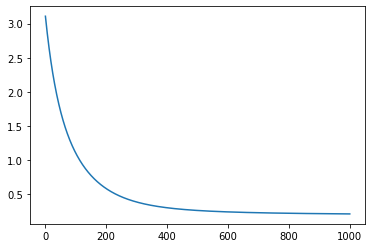

In [24]:
import matplotlib.pyplot as plt
plt.plot(iter,cost)
plt.show()

The resultant weight(parameters) vector is:

In [25]:
W,W.shape

(array([[ 0.01610684,  0.01916344,  0.24391184, -0.03865965,  0.04709405,
          0.00273491,  0.01651178,  0.57825289,  0.1728835 ,  0.04658175,
         -0.04179181,  0.48762778, -0.05106086]]), (1, 13))

Using the above parameters, predict the values for test set.

In [26]:
out = np.dot(W, x_test.T)
out,out.shape

(array([[-0.36278052, -0.7736988 , -0.88665068, ..., -1.52365522,
         -0.25725042, -1.50814304]]), (1, 1613))

In [27]:
x_test.shape,y_test.shape

((1613, 13), (1613,))

In [28]:
y_test = np.reshape(y_test, (1,len(y_test)))

In [29]:
y_test.shape

(1, 1613)

Compting the mean squared error on the test set

In [30]:
Avg_error = np.sum((out-y_test) * (out-y_test)) /y_test.shape[1]
Avg_error

0.46456509386373923